In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("../input"))



['heart.csv']


In [2]:
dataset = pd.read_csv('../input/heart.csv')

Let's check the Data

In [3]:
dataset.head()

age  sex  cp  trestbps  chol   ...    oldpeak  slope  ca  thal  target
0   63    1   3       145   233   ...        2.3      0   0     1       1
1   37    1   2       130   250   ...        3.5      0   0     2       1
2   41    0   1       130   204   ...        1.4      2   0     2       1
3   56    1   1       120   236   ...        0.8      2   0     2       1
4   57    0   0       120   354   ...        0.6      2   0     2       1

[5 rows x 14 columns]

parallel coordinates analysis from heart disease dataset. This visualization shows the cholesterol attribute is the unique that presents any distinction to categorize the two classes.

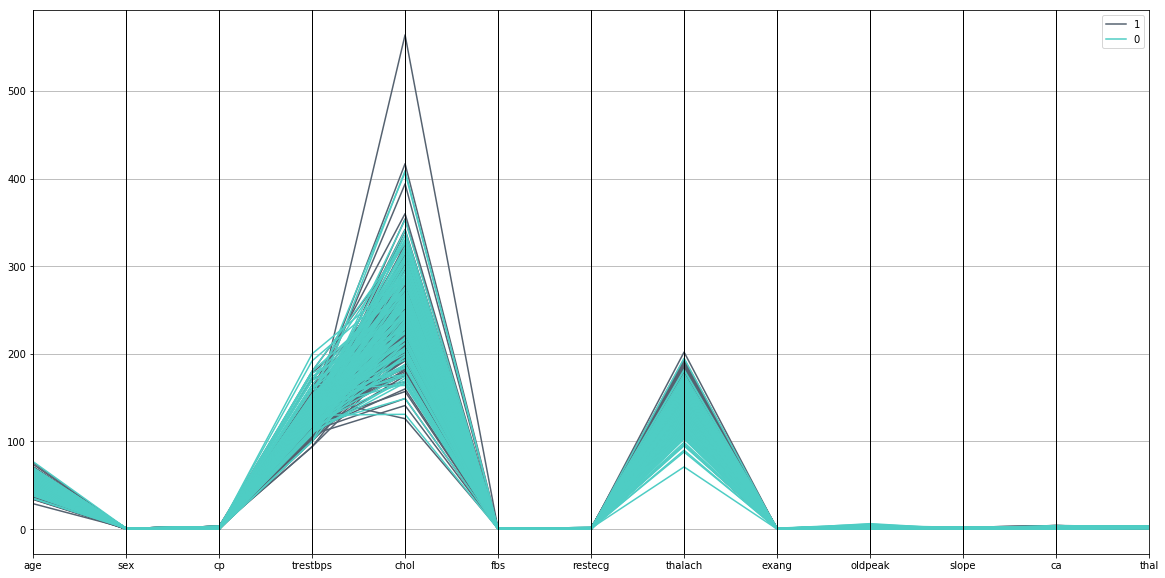

In [4]:
from pandas.plotting import parallel_coordinates
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
parallel_coordinates(dataset, 'target',color=('#556270', '#4ECDC4'))

plt.show()

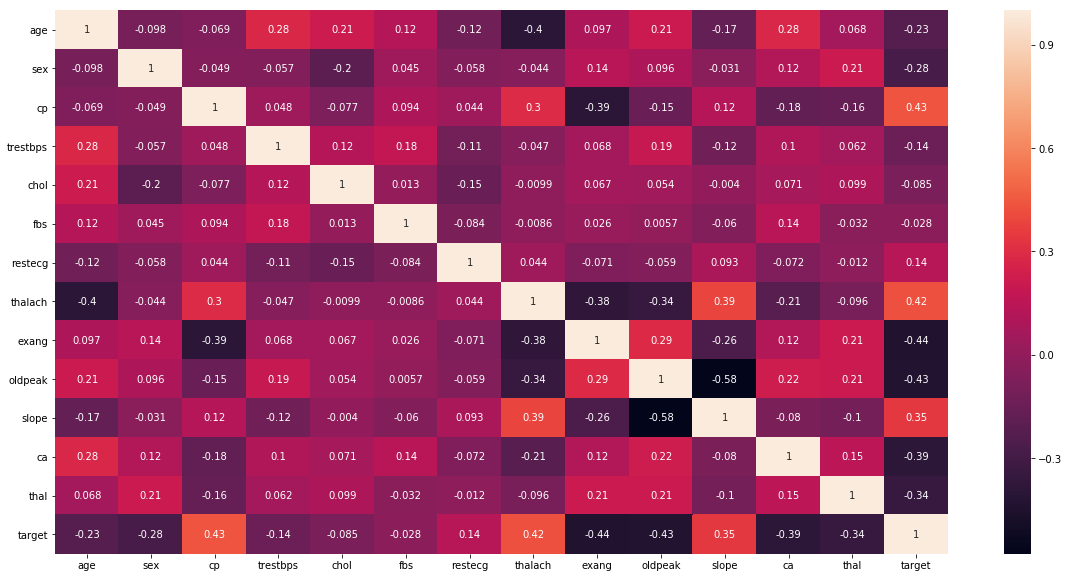

In [5]:
###Lets see a heatmap
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot = True)

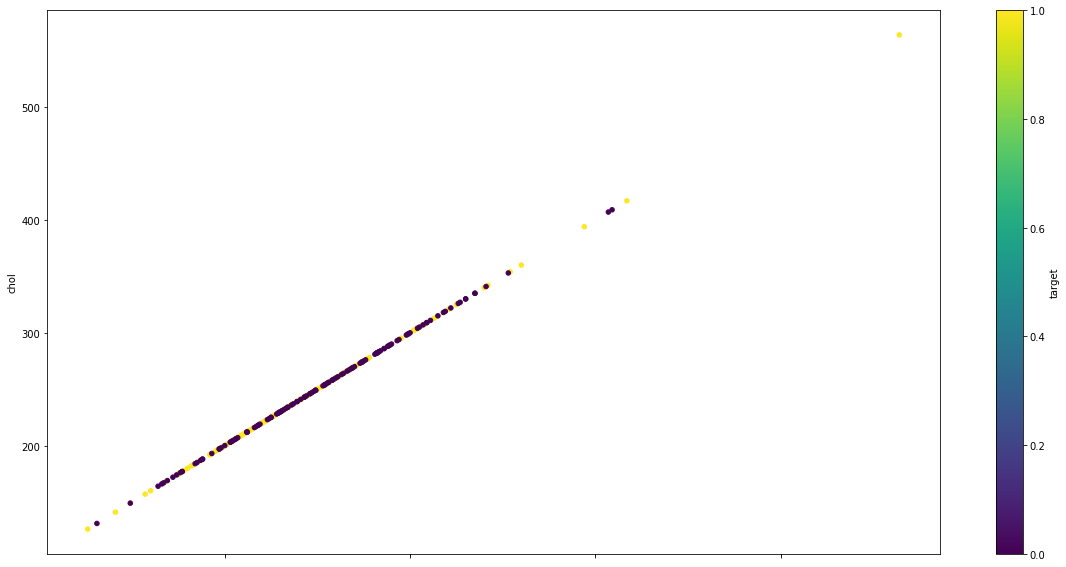

In [6]:
dataset.plot.scatter(x='chol', y='chol',c='target',  colormap='viridis', figsize=(20,10))

**Now we have to predict a target means patient is targeted with heart disease 1 means yes and 0 means no
**

In [7]:
###lets split the data

x = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

In [8]:
##Now split the data into training & testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 ,random_state = 0)


**Let's see a prediction with Decision tree classifier**

In [9]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(y_pred)


[0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


In [10]:
print('Decisiontree accuracy is:',classifier.score(x_test,y_test))

Decisiontree accuracy is: 0.7868852459016393


In [11]:
##Lets check the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix is \n:',cm)

Confusion matrix is 
: [[22  5]
 [ 8 26]]


In [12]:
###Lets check the classification report
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

   micro avg       0.79      0.79      0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



**In decision tree we got a accuracy of 0.78 % and 13 predictions are wrong ,it's good :)**
**Now let's try with Logistic regression**

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
print('Logistic regression accuracy is:',classifier.score(x_test,y_test))

Logistic regression accuracy is: 0.8524590163934426


**Let's check a confusion matrix**

In [15]:
cm = confusion_matrix(y_test,y_pred)
print('Logistic regression confusion matrix\n:',cm)

Logistic regression confusion matrix
: [[22  5]
 [ 4 30]]
